# You Only Look Once

**You Only Look Once** o YOLO es una familia de modelos basados en Deep Learning desarrollados para la detección rápida de objetos, la idea fue publicada en 2015 por el equipo colaborador de Joseph Redmon en un articulo titulado [You Only Look Once: Unified, Real-Time Object Detection](https://arxiv.org/abs/1506.02640).


![](https://drive.google.com/uc?id=1AVBoIVxr3WswwHj-0vr42VQc76jViX6O)


YOLO es el estado del arte en cuanto a detección de objetos y sus aplicaciones son fundamentales en diferentes aspectos tecnológicos de punta.


* **Conducción autonóma**: YOLO puede ser usado por vehículos autonómos para la detección de objetos alrededor del carro, tal como otros vehículos, peatones, o señales de tránsito. El objetivo detrás de la detección es alimentar un algortimo para la toma de decisiones que eviten una colisión.

* **Vida Salvaje**: Este algortimo es usado para detectar diferentes tipos de animales en diferentes tipos de ambientes. El objetivo de esta aplicación es detectar especies en riesgo para preservar especies.

* **Seguridad**: YOLO también puede ser usado en sistemas de seguridad para reforzar la seguridad de algunas áreas restringidas. Si alguien atraviesa una zona restringida el algoritmo la detectará lo cual generará una señal de alerta.

# Ventajas de YOLO

* **Velocidad:** este algoritmo mejora la velocidad de detección porque puede predecir objetos en tiempo real.

* **Alta precisión:** YOLO es una técnica predictiva que proporciona resultados precisos con un error mínimo.

* **Capacidades de aprendizaje:** El algoritmo tiene excelentes capacidades de aprendizaje que le permiten aprender las representaciones de objetos y aplicarlas en la detección de objetos.


#  Arquitectura de YOLO

La detección de objetos en imágenes implica, no solamente identificar de que tipo de objeto se trata, sino también localizarlo dentro de la imagen (obtener las coordenadas de la “caja” que lo contiene). En otras palabras, detección = clasificación + localización.

El algortimo de YOLO está basado en una CNN para detectar objetos en tiempo real. Como su nombre lo sugiere (You only Look Once), el algortimo requiere una propagación simple a través de la ANN para detectar **multiples** objetos. La CNN es capaz de predecir varias probabilidades para diferentes clases y encerrarlas simultaneamente.

![](https://drive.google.com/uc?id=1ScEBmkMbKZsM985n8CqJO_7bY75iC6yX)




# ¿Cómo se hace la detección?

Para llevar a cabo la detección primero divide la imagen en una cuadrícula de SxS (imagen de la izquierda). En cada una de las celdas predice N posibles “bounding boxes” y calcula el nivel de probabilidad de cada una de ellas (imagen del centro), es decir, se calculan SxSxN diferentes cajas, la gran mayoría de ellas con un nivel de certidumbre muy bajo. Después de obtener estas predicciones se procede a eliminar las cajas que estén por debajo de un límite. A las cajas restantes se les aplica un paso de “non-max suppression” que sirve para eliminar posibles objetos que fueron detectados por duplicado y así dejar únicamente el mas exacto de ellos (imagen de la derecha).

![](https://miro.medium.com/max/700/1*e0VY6U1_WMF2KBoKQNZvkQ.png)

*Tomado de este [blog](https://medium.com/@enriqueav/detecci%C3%B3n-de-objetos-con-yolo-implementaciones-y-como-usarlas-c73ca2489246) en medium.*

In [1]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-9-9 torch 1.9.0+cu102 CPU

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

image 1/1: 720x1280 2 persons, 2 ties
Speed: 699.2ms pre-process, 336.4ms inference, 1.4ms NMS per image at shape (1, 3, 384, 640)


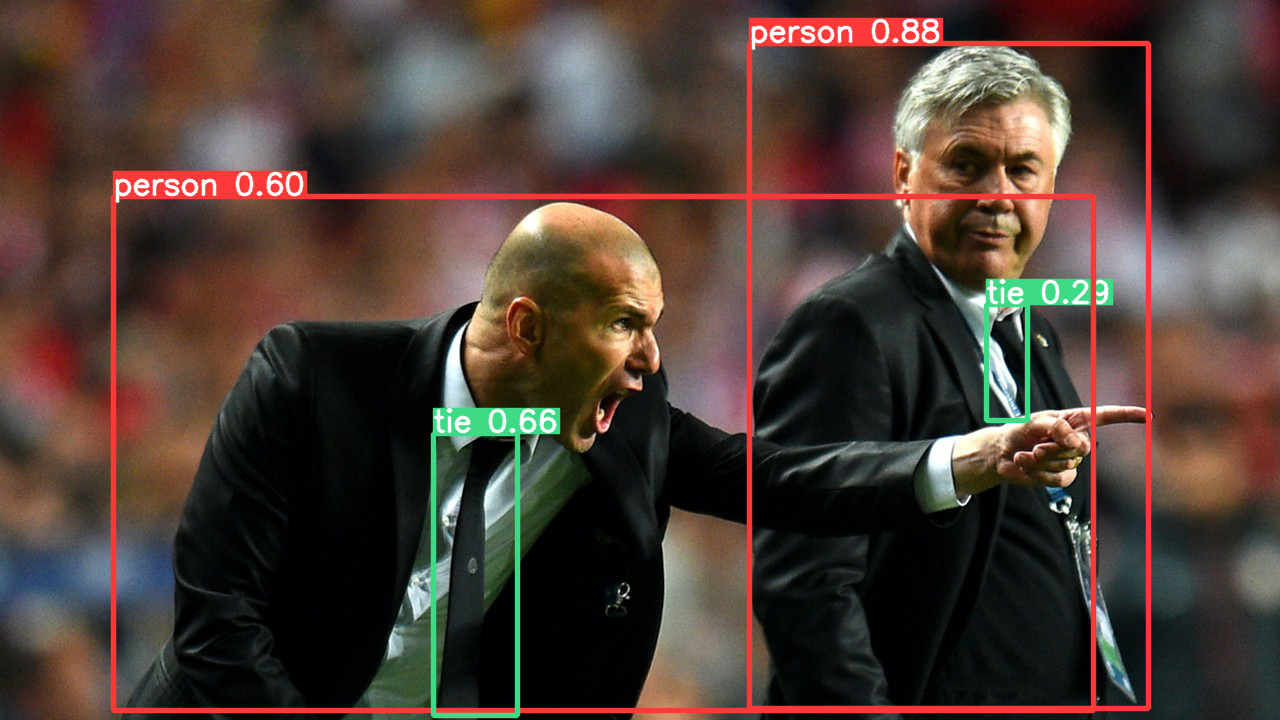

In [2]:
# Images
imgs = ['https://ultralytics.com/images/zidane.jpg']

# Predicción
results = model(imgs)

# Resultados
results.print()
results.show() 

# Otro ejemplo

![](http://www.radiosantafe.com/wp-content/uploads/2009/09/plaza-de-bolivar.jpg)

In [3]:
# Otro ejemplo

imgs = ['http://www.radiosantafe.com/wp-content/uploads/2009/09/plaza-de-bolivar.jpg']

# Predicción
results = model(imgs)

# Resultados
results.print()
results.show() 

image 1/1: 450x600 20 persons, 21 birds
Speed: 626.8ms pre-process, 402.7ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)


# Otro Ejemplo

![](https://autosdeprimera.com/v2/wp-content/uploads/2019/01/entrada-bogota-autonorte.jpg)

image 1/1: 600x900 2 persons, 4 cars, 1 motorcycle, 1 bus, 2 trucks, 1 traffic light
Speed: 671.0ms pre-process, 370.7ms inference, 1.1ms NMS per image at shape (1, 3, 448, 640)


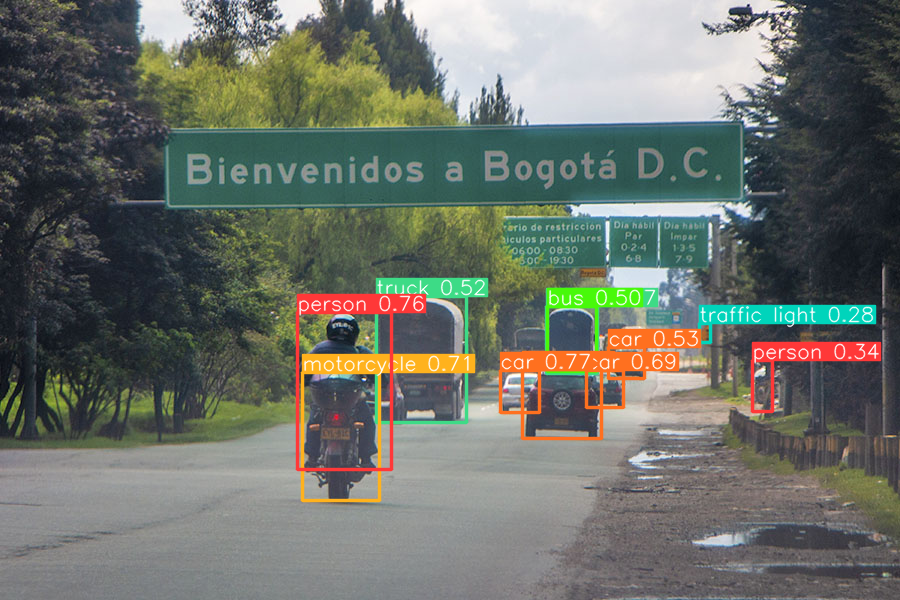

In [4]:
# Otro ejemplo

imgs = ['https://autosdeprimera.com/v2/wp-content/uploads/2019/01/entrada-bogota-autonorte.jpg']

# Predicción
results = model(imgs)

# Resultados
results.print()
results.show() 

# Reentrenando YOLO

Una dificultad al momento de utilizar YOLO es que se limita a la detección de objetos con los que fue entrenado, esta dificultad se puede superar reentrenando el modelo con un dataset que contenga los objetos de interese. Al igual que otros modelos de DL, YOLO puede ser reentrenado para resolver tareas nuevas, en este caso la detección de objetos nuevos.

Para crear un set de entrenamiento para nuevas clases además de las imágenes, cada una debe ir acompañada de un archivo de texto indicando las coordenadas y la clase a la que pertenece cada uno de los objetos.

El formato comunmente usado es el siguiente:

``class_id_0   x_center   y_center   width   height``


``class_id_1   x_center   y_center   width   height``

Cada fila en este archivo representa un objeto de la imagen.


Veamos el ejemplo ...

# OCR con Tesseract

OCR o reconocimiento óptico de caracteres es un algortimo que transforma una imagen 2-Dimensional que contiene caracteres en texto de máquina. OCR es un mecanismo que consiste de una serie de subprocesos:

* Preprocesamiento de la Imagen
* Localización del texto
* Segmentación de Caracteres
* Reconocimiento de Caracteres
* Post-procesamiento

Durante casi dos décadas, los sistemas de reconocimiento óptico de caracteres se han utilizado ampliamente para proporcionar entrada de texto automatizada en sistemas computarizados. Sin embargo, en todo este tiempo, los sistemas de OCR convencionales nunca han superado su incapacidad para leer más que un puñado de tipos de letra y formatos de página. 

![](https://research.aimultiple.com/wp-content/uploads/2019/11/OCR-example-2-800x526.png)

Los motores de OCR de próxima generación resuelven estos problemas mencionados de manera muy ágil utilizando las últimas investigaciones en DL. Al aprovechar la combinación de modelos profundos y enormes conjuntos de datos disponibles públicamente, los modelos logran precisiones de vanguardia en tareas determinadas. Hoy en día también es posible generar datos sintéticos con diferentes fuentes utilizando GAN.


**Alguas Aplicaciones**

* **Bancos**: 
  * OCR puede extraer datos en cheques para capturar la información de la cuenta, el monto en dinero escrito a mano y la firma.
  * Solicitudes hipotecarias que contienen numerosos documentos.
  * Recibos de pago.

* **Seguros**: 
  * El procesamiento de reclamaciones se puede automatizar mediante OCR y tecnologías de apoyo

* **Legal**: 
  * Las firmas legales pueden digitalizar todos sus documentos impresos, como declaraciones juradas, juicios, presentaciones, declaraciones, testamentos a través de OCR.
* **Cuidado de la salud**: 
  * OCR puede escanear informes que contienen radiografías, enfermedades previas, tratamientos o diagnósticos, pruebas, registros hospitalarios, pagos de seguros.



In [17]:
!apt install tesseract-ocr
!pip install pytesseract

!cp /content/drive/MyDrive/Colab/IntroDeepLearning_202102/spa.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [11]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

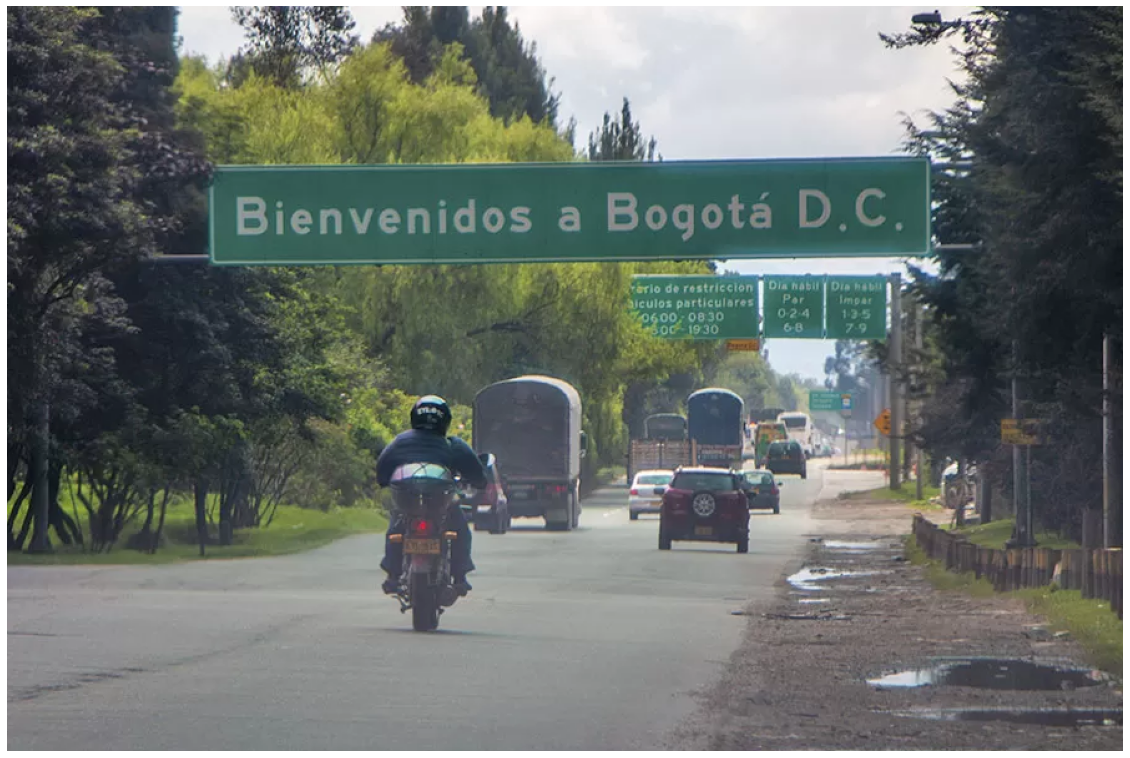

s

  
 

TE
TA



In [18]:
image = 'entrada_bogota.png'

fig = plt.figure(figsize=(20,15))
plt.imshow(Image.open(image))
plt.axis(False)
plt.show()

extractedInformation = pytesseract.image_to_string(Image.open(image), lang='spa')

print(extractedInformation)

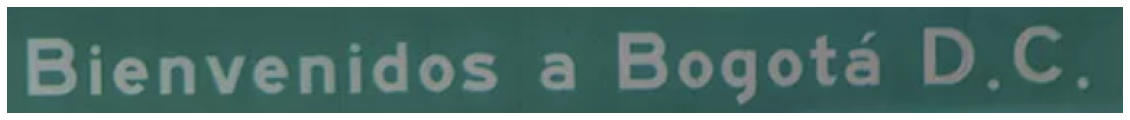

Bienvenidos a Bogotá D.C.



In [19]:
image = 'bienvenidos_bogota.png'

fig = plt.figure(figsize=(20,15))
plt.imshow(Image.open(image))
plt.axis(False)
plt.show()

extractedInformation = pytesseract.image_to_string(Image.open(image), lang='spa')

print(extractedInformation)